# Computational Finance Lab Assignment 5

In [25]:
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import scipy.stats as si
from scipy import optimize

from scipy.stats import norm

In [2]:
# constants
S0 = 50
K = 50
T = 1
r = 0.08
sigma = 0.3

#### Approximation based interpolation algorithm

In [3]:
# calculated regression constants
a0 = 3.9649
a1 = 0.032325

b0 = 1.04083
b1 = 0.00963

In [12]:
def European_Put(S0 = S0, K = K, T = T, r = r, sigma = sigma):
    """
        Uses the Black Scholes closed form solution of European
        option to price a put option
    """
    d1 = (np.log(S0/K) + (r + sigma*sigma/2)*(T))/(sigma*np.sqrt(T))
    d2 = (np.log(S0/K) + (r - sigma*sigma/2)*(T))/(sigma*np.sqrt(T))

    put = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S0 * si.norm.cdf(-d1, 0.0, 1.0))
    return put

In [18]:
def interpol(S0 = S0, K = K, T = T):
    """
        Prices an American put option based on an interpolation
        approximation of two European puts
    """
    gamma = (sigma*sigma*T)/(b0*sigma*sigma*T + b1)
    Sf_approx = K*((2*r/(sigma*sigma + 2*r))**gamma)
    beta = np.log(S0/Sf_approx)/np.log(K/Sf_approx)
    alpha = (r*T/(a0*r*T + a1))**beta

    return alpha*(European_Put(S0 = S0, K = K*np.exp(r*T), T = T)) + (1-alpha)*(European_Put(S0 = S0, K = K, T = T))

In [19]:
print(f"The approximated value through interpolation for the American Put is {interpol()}")

The approximated value through interpolation for the American Put is 4.457871483794841


In [26]:
def quad(S0 = S0, K = K, T = T):
    """
        Prices an American based on quadratic approximation
    """

    q = (2*r)/(sigma*sigma)
    H = 1 - np.exp(-r*T)
    l = -0.5 * ((q-1) + np.sqrt((q-1)**2 + (4*q)/(H)))

    d1 = lambda x: (np.log(x/K) + (r + sigma*sigma/2)*(T))/(sigma*np.sqrt(T))
    d2 = lambda x: (np.log(x/K) + (r - sigma*sigma/2)*(T))/(sigma*np.sqrt(T))
    opt_exp = lambda x: x*norm.cdf(d1(x)) * (1- 1/l) + K*np.exp(-r*T)*(1-norm.cdf(d2(x))) - K
    Sf = optimize.newton(opt_exp, 100)
    
    if S0>Sf:
        V = European_Put(S0 = S0, K = K, T = T) - Sf * norm.cdf(d1(Sf)) * (S0/Sf)**l / l
    else:
        V = K-S0

    return V

In [28]:
print(f"The approximated value through quadratic approximation for the American Put is {quad()}")

The approximated value through quadratic approximation for the American Put is 4.4688624959585015


Now plotting the graphs

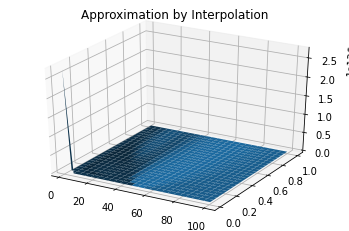

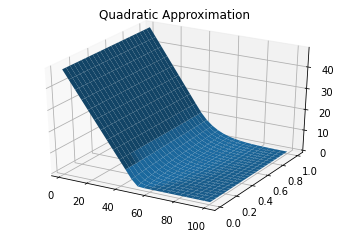

In [32]:

def plot(alg, name):
    plt.figure(name)
    ax = plt.axes(projection ='3d')
    S = np.linspace(2,100,25)
    T = np.linspace(0.01,1,25)
    S, T = np.meshgrid(S,T)
    Z = np.zeros(S.shape)
    for i in range(S.shape[0]):
        for j in range(S.shape[1]):
            Z[i][j] = alg(S0 = S[i][j],T = T[i][j])
    plt.title(name)
    ax.plot_surface(S,T,Z)
    
plot(interpol, 'Approximation by Interpolation')   
plot(quad, 'Quadratic Approximation')   

plt.show()